In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import os
import PIL.Image as Image
from typing import Tuple
from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import cv2
from LookGenerator.datasets.utils import prepare_image_for_model, to_array_from_model_bin
import LookGenerator.datasets.transforms as custom_transforms

In [8]:
image = Image.open(r"C:\Users\DenisovDmitrii\Desktop\test\image\04001_00.jpg")


In [9]:
transform_input = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.25, 0.25, 0.25]
    )
])

transform_output = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])
model = UNet(in_channels=3, out_channels = 1)
img_to_model = prepare_image_for_model(image, transform_input)

In [10]:
model = load_model(model,
                       r"C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session29\unet_epoch_14_0.050900589769421994.pt")
modelled = model(img_to_model)

torch.Size([1, 1, 256, 192])
torch.Size([1, 3, 256, 192])


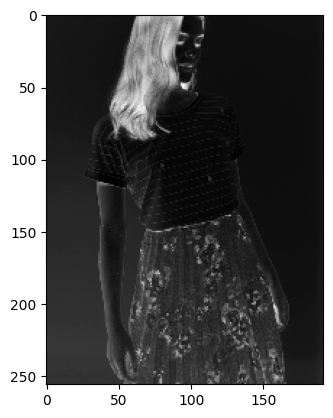

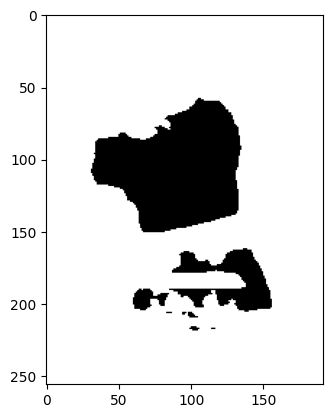

In [11]:
print(modelled.shape)
print(img_to_model.shape)
plt.imshow((img_to_model.detach().numpy()[0,0,:,:]), cmap = 'binary')
plt.show()
modelled_img = to_array_from_model_bin(transform_output(modelled.detach()))

plt.imshow(modelled_img,cmap = 'binary')
plt.show()

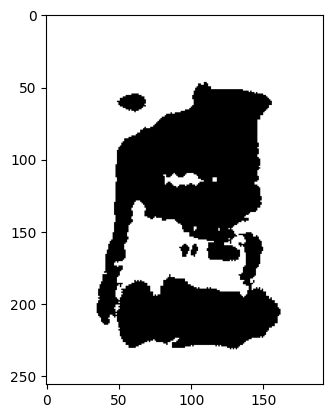

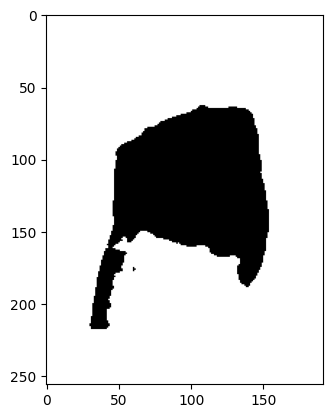

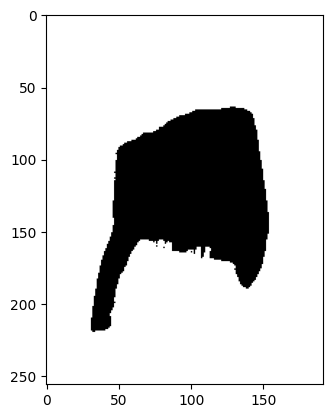

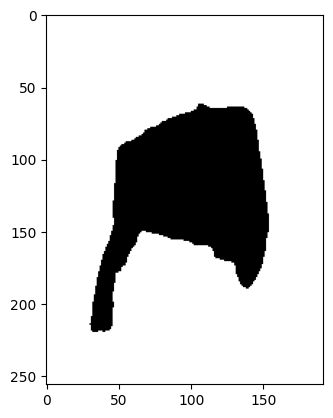

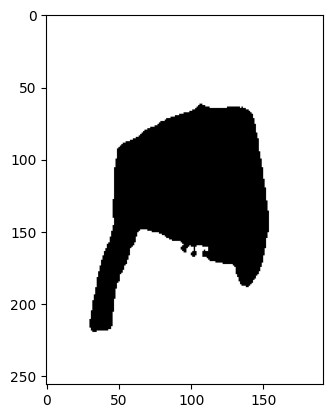

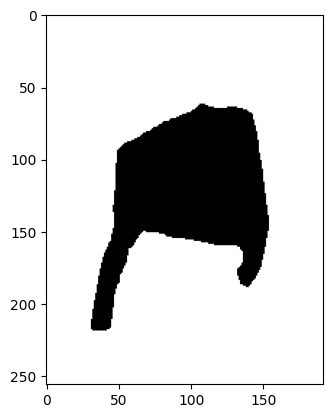

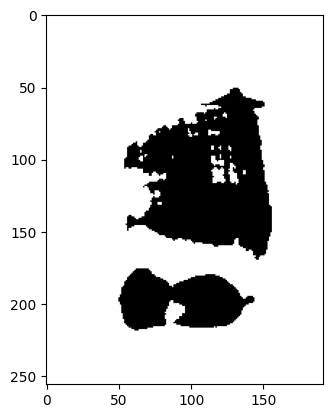

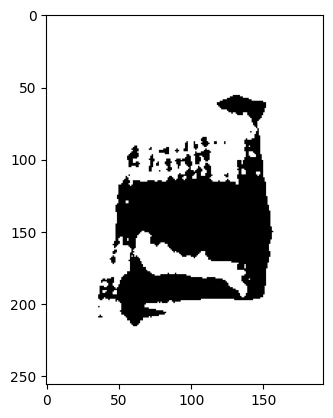

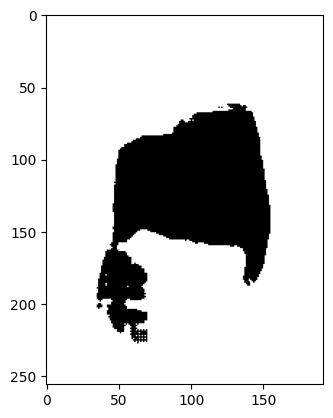

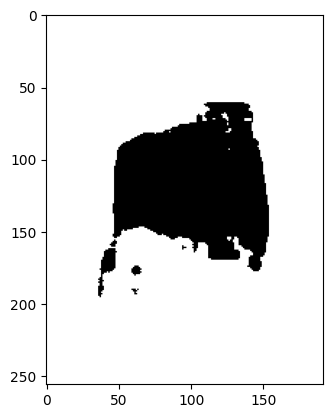

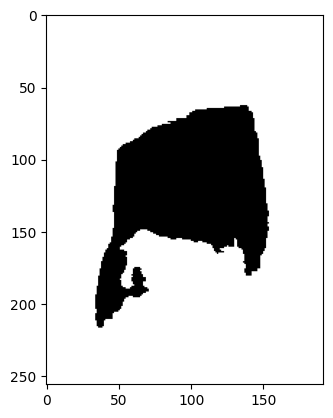

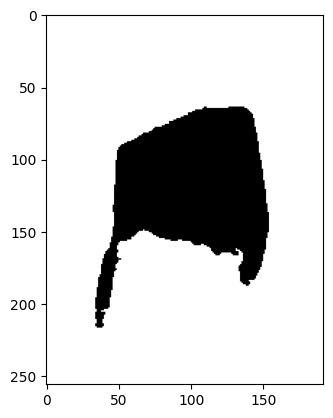

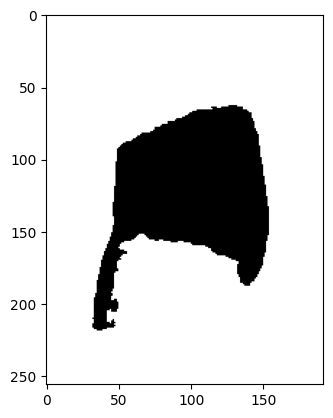

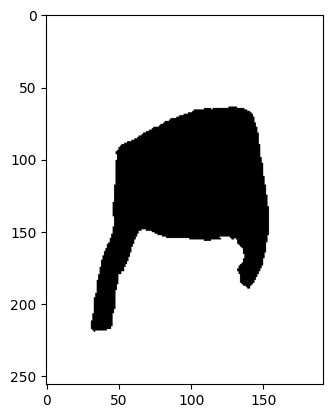

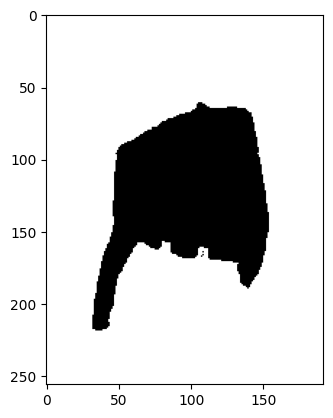

In [6]:
url = r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session29'
list_files = os.listdir(url)
for file in list_files:
    model = load_model(model, url + "\\" + file)
    seg = model(img_to_model)

    seg = to_array_from_model_bin(transform_output(seg.detach()))
    plt.imshow(seg, cmap = 'binary')
    plt.show()

In [7]:
list_files

['unet_epoch_0_0.2541441894688849.pt',
 'unet_epoch_10_0.05768732268805221.pt',
 'unet_epoch_11_0.060389149523640086.pt',
 'unet_epoch_12_0.06015612140803014.pt',
 'unet_epoch_13_0.044799123527640004.pt',
 'unet_epoch_14_0.050900589769421994.pt',
 'unet_epoch_1_0.3109619703333257.pt',
 'unet_epoch_2_0.1598496647962069.pt',
 'unet_epoch_3_0.11449028235875953.pt',
 'unet_epoch_4_0.11674673754279896.pt',
 'unet_epoch_5_0.08474400525881072.pt',
 'unet_epoch_6_0.07084770614312867.pt',
 'unet_epoch_7_0.06522897384681944.pt',
 'unet_epoch_8_0.06324559311240406.pt',
 'unet_epoch_9_0.0686489928955749.pt']